## Problem 1: Visualise data in a static map (10 points)


Create a *static* **thematic map** using the skills you learnt during lesson 5. The map should <br>
contain more than one layer (from at least two different data sets). Pay attention to classification <br>
and visualisation (appropriate colour scheme choice, etc.). Write your code in this notebook, and <br>
store the resulting maps in `.png` format in the `NOTEBOOK_DIRECTORY / "docs"` folder.

### Topic of the map

- Use any of the data sets we have used during the course (travel time data, population grid), or <br>
  any other data set of your interest (for example, [open data sets from Statistics Finland](https://www.stat.fi/org/avoindata/index_en.html), <br>
  or the open geo-data from [the Helsinki Region Infoshare](https://hri.fi/en)). If you download <br>
  data sets, add, commit, and push them to the `DATA_DIRECTORY`. Be sure to include an attribution <br>
  to each data set in your output map!
- Feel free to start from and adapt examples from the course material! You can take one step further <br>
  and add additional analysis to, e.g., the shopping centre dominance or the population within vincinity <br>
  of certain addresses)

### Criteria

- The map has more than one data layer (for instance, the results of an analysis, and the road network <br>
  to illustrate a complex spatial pattern). If (and only if) you think it adds additional value, feel <br>
  free to add a base map (but a base map does not count as an own layer) (2 points)
- The map portrays the output of an analysis or a classification that adds value beyond just displaying <br>
  the raw data (3 points)
- The map follows good cartographic practices (appropriate map extent and zoom level, colour scheme, <br>
  legend and data sources, etc.) (5 points)

### Output

- Save the map(s) in `.png` format in the `NOTEBOOK_DIRECTORY / "docs"` folder, remember to add, commit, <br>
  and push them to the GitHub repository
- Remember to also add, commit, and push input data sets and code

---

In [ ]:
import pathlib
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"
OUTPUT_DIRECTORY = NOTEBOOK_PATH / "docs"

In [89]:
import matplotlib.pyplot as plt
import contextily

In [10]:
import geopandas
import requests

WFS_BASE_URL = "http://gis.vantaa.fi/geoserver/wfs"
LAYER_NAME = "gis:maalajikartta_perus"

params = {
    "service": "WFS",
    "version": "1.0.0",
    "request": "GetFeature",
    "typeName": LAYER_NAME,
    "outputFormat": "application/json",  # Request GeoJSON output
}

response = requests.get(WFS_BASE_URL, params=params)
response.raise_for_status()  # Raise an error if the request fails

soil = geopandas.read_file(response.text).set_crs("EPSG:3879")

<Axes: >

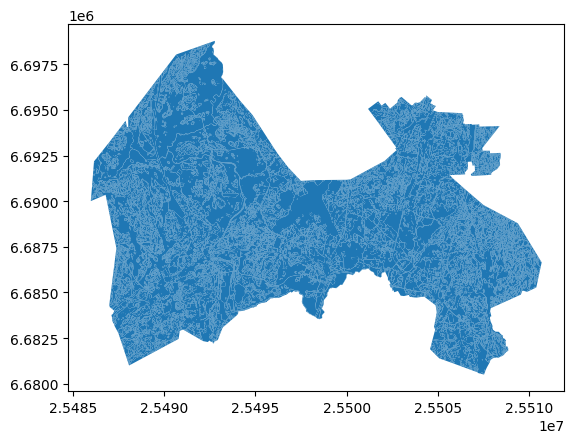

In [11]:
soil.plot()

In [12]:
soil.head()

,id,pintamaalaji,pohjamaalaji,teksti1,teksti2,geometry
0,maalajikartta_perus.fid-1091982_190bcc4decc_-7b66,Moreeni,None,Mr,,"POLYGON Z ((25488000.000 6681429.704 0.000, 25..."
1,maalajikartta_perus.fid-1091982_190bcc4decc_-7b65,Moreeni,None,Mr,,"POLYGON Z ((25487763.500 6682000.000 0.000, 25..."
2,maalajikartta_perus.fid-1091982_190bcc4decc_-7b64,Moreeni,None,Mr,,"POLYGON Z ((25487769.100 6682040.100 0.000, 25..."
3,maalajikartta_perus.fid-1091982_190bcc4decc_-7b63,Moreeni,None,Mr,,"POLYGON Z ((25487693.500 6682212.900 0.000, 25..."
4,maalajikartta_perus.fid-1091982_190bcc4decc_-7b62,Moreeni,None,Mr,,"POLYGON Z ((25488000.000 6681377.750 0.000, 25..."


In [18]:
df = soil.drop(columns=['pohjamaalaji', 'teksti1', 'teksti2'])


In [19]:
df.head()

,id,pintamaalaji,geometry
0,maalajikartta_perus.fid-1091982_190bcc4decc_-7b66,Moreeni,"POLYGON Z ((25488000.000 6681429.704 0.000, 25..."
1,maalajikartta_perus.fid-1091982_190bcc4decc_-7b65,Moreeni,"POLYGON Z ((25487763.500 6682000.000 0.000, 25..."
2,maalajikartta_perus.fid-1091982_190bcc4decc_-7b64,Moreeni,"POLYGON Z ((25487769.100 6682040.100 0.000, 25..."
3,maalajikartta_perus.fid-1091982_190bcc4decc_-7b63,Moreeni,"POLYGON Z ((25487693.500 6682212.900 0.000, 25..."
4,maalajikartta_perus.fid-1091982_190bcc4decc_-7b62,Moreeni,"POLYGON Z ((25488000.000 6681377.750 0.000, 25..."


In [20]:
df = df.rename(columns={'pintamaalaji': 'Soil Type'})

In [21]:
df.head()

,id,Soil Type,geometry
0,maalajikartta_perus.fid-1091982_190bcc4decc_-7b66,Moreeni,"POLYGON Z ((25488000.000 6681429.704 0.000, 25..."
1,maalajikartta_perus.fid-1091982_190bcc4decc_-7b65,Moreeni,"POLYGON Z ((25487763.500 6682000.000 0.000, 25..."
2,maalajikartta_perus.fid-1091982_190bcc4decc_-7b64,Moreeni,"POLYGON Z ((25487769.100 6682040.100 0.000, 25..."
3,maalajikartta_perus.fid-1091982_190bcc4decc_-7b63,Moreeni,"POLYGON Z ((25487693.500 6682212.900 0.000, 25..."
4,maalajikartta_perus.fid-1091982_190bcc4decc_-7b62,Moreeni,"POLYGON Z ((25488000.000 6681377.750 0.000, 25..."


In [35]:
df.dropna()

,id,Soil Type,geometry
0,maalajikartta_perus.fid-1091982_190bcc4decc_-7b66,Moreeni,"POLYGON Z ((25488000.000 6681429.704 0.000, 25..."
1,maalajikartta_perus.fid-1091982_190bcc4decc_-7b65,Moreeni,"POLYGON Z ((25487763.500 6682000.000 0.000, 25..."
2,maalajikartta_perus.fid-1091982_190bcc4decc_-7b64,Moreeni,"POLYGON Z ((25487769.100 6682040.100 0.000, 25..."
3,maalajikartta_perus.fid-1091982_190bcc4decc_-7b63,Moreeni,"POLYGON Z ((25487693.500 6682212.900 0.000, 25..."
4,maalajikartta_perus.fid-1091982_190bcc4decc_-7b62,Moreeni,"POLYGON Z ((25488000.000 6681377.750 0.000, 25..."
...,...,...,...
18939,maalajikartta_perus.fid-1091982_190bcc4decc_42d,Siltti,"POLYGON Z ((25505330.794 6683129.064 0.000, 25..."
18940,maalajikartta_perus.fid-1091982_190bcc4decc_42e,Siltti,"POLYGON Z ((25505286.100 6682920.300 0.000, 25..."
18941,maalajikartta_perus.fid-1091982_190bcc4decc_42f,Siltti,"POLYGON Z ((25507064.100 6681726.900 0.000, 25..."
18942,maalajikartta_perus.fid-1091982_190bcc4decc_430,Siltti,"POLYGON Z ((25507003.500 6682563.900 0.000, 25..."


In [36]:
df['Soil Type'].unique()

array(['Moreeni', 'Kallioinen alue', 'Savi', 'Täytemaa', 'Siltti',
       'Hiekka', 'Vesi', 'Turve', '', 'Lieju', 'Sora'], dtype=object)

In [27]:
print(df.crs)

EPSG:3879


In [71]:
df.loc[df['Soil Type'] == '', 'Soil Type'] = 'Unknown'

In [72]:
df['Soil Type'].unique()

array(['Moreeni', 'Kallioinen alue', 'Savi', 'Täytemaa', 'Siltti',
       'Hiekka', 'Vesi', 'Turve', 'Unknown', 'Lieju', 'Sora'],
      dtype=object)

In [92]:
df = df.to_crs("EPSG:3857")

In [93]:
df.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

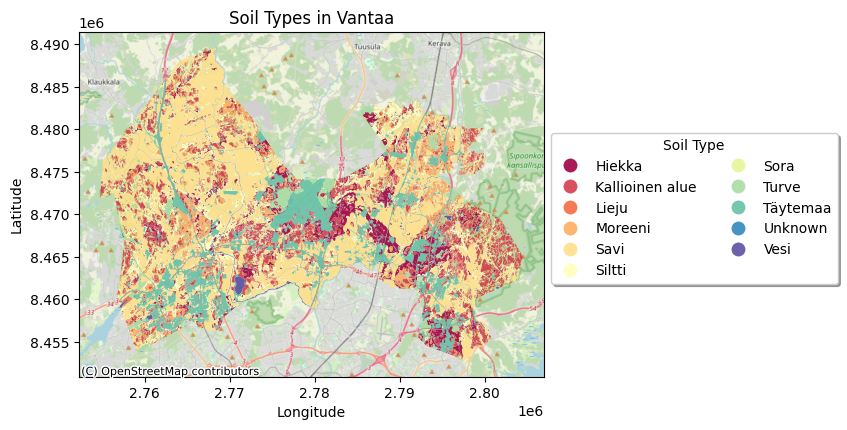

In [100]:
ax = df.plot(
    figsize=(6, 6),
    column="Soil Type",
    cmap="Spectral",
    linewidth=0,
    alpha=0.9,
    legend=True,
    legend_kwds={"title": "Soil Type", "loc": "lower left", "bbox_to_anchor":(1, 0.25),
       "ncol":2, "fancybox":"True", "shadow":True},
)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Soil Types in Vantaa")
contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)
plt.show()


ADDING BASEMAP

In [85]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 32.6 MB/s eta 0:00:00
